<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_Sprint18_DatasetCreation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Creation

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [5]:
path = './datasets'
flist = os.listdir(path)

In [6]:
!ls -a ./datasets

.   cat.0.jpg  cat.2.jpg  cat.4.jpg  dog.1.jpg	dog.3.jpg
..  cat.1.jpg  cat.3.jpg  dog.0.jpg  dog.2.jpg	dog.4.jpg


In [7]:
flist

['dog.4.jpg',
 'cat.3.jpg',
 'dog.1.jpg',
 'cat.0.jpg',
 'dog.2.jpg',
 'cat.1.jpg',
 'dog.0.jpg',
 'dog.3.jpg',
 'cat.4.jpg',
 'cat.2.jpg']

In [8]:
img_list = [os.path.join(path, name) for name in os.listdir(path)]
img_list

['./datasets/dog.4.jpg',
 './datasets/cat.3.jpg',
 './datasets/dog.1.jpg',
 './datasets/cat.0.jpg',
 './datasets/dog.2.jpg',
 './datasets/cat.1.jpg',
 './datasets/dog.0.jpg',
 './datasets/dog.3.jpg',
 './datasets/cat.4.jpg',
 './datasets/cat.2.jpg']

# [Problem 1] Learning classification with self-made dataset

In [37]:
# Constant
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

d_img_array = np.empty((0, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
Y = []
for img in img_list:
    d_img = Image.open(img)
    d_img = d_img.resize(IMAGE_SIZE)
    d_img = np.array(d_img)
    d_img = d_img / 255.0
    d_img = d_img.reshape((1, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

    Y.append(int(bool(re.search('dog', img))))

X = d_img_array
Y = np.array(Y)

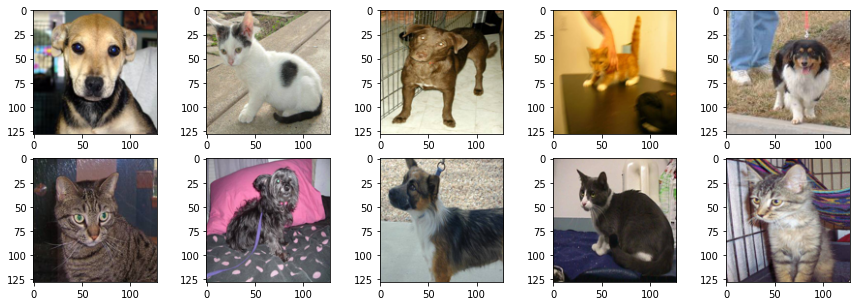

In [38]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X[i])

In [44]:
Y

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras import optimizers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [51]:
model = Sequential()

model.add(Conv2D(16, (2,2), activation = "relu", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32, (2,2), activation = "relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(200,  activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(200, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))
opt = optimizers.Adam(lr=0.001)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1/1 [==============================] - 1s 945ms/step - loss: 0.6785 - accuracy: 0.7000
Epoch 2/20
1/1 [==============================] - 0s 89ms/step - loss: 0.6690 - accuracy: 0.7000
Epoch 3/20
1/1 [==============================] - 0s 84ms/step - loss: 0.6174 - accuracy: 0.7000
Epoch 4/20
1/1 [==============================] - 0s 90ms/step - loss: 0.2084 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 92ms/step - loss: 1.1676 - accuracy: 0.4000
Epoch 6/20
1/1 [==============================] - 0s 88ms/step - loss: 0.6600 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 88ms/step - loss: 0.8752 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 89ms/step - loss: 0.1514 - accuracy: 0.9000
Epoch 9/20
1/1 [==============================] - 0s 89ms/step - loss: 0.0553 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 97ms/step - loss: 0.2819 - accuracy: 0.9000
Epoch 11/20
1/1 [===========

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((8, 128, 128, 3), (2, 128, 128, 3), (8,), (2,))

In [55]:
model.fit(X_train, Y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 78ms/step - loss: 0.1101 - accuracy: 0.8750
Epoch 2/20
1/1 [==============================] - 0s 78ms/step - loss: 0.0173 - accuracy: 1.0000
Epoch 3/20
1/1 [==============================] - 0s 74ms/step - loss: 0.0190 - accuracy: 1.0000
Epoch 4/20
1/1 [==============================] - 0s 80ms/step - loss: 0.0125 - accuracy: 1.0000
Epoch 5/20
1/1 [==============================] - 0s 76ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 6/20
1/1 [==============================] - 0s 81ms/step - loss: 0.0795 - accuracy: 1.0000
Epoch 7/20
1/1 [==============================] - 0s 76ms/step - loss: 0.0576 - accuracy: 1.0000
Epoch 8/20
1/1 [==============================] - 0s 76ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 9/20
1/1 [==============================] - 0s 77ms/step - loss: 9.6154e-04 - accuracy: 1.0000
Epoch 10/20
1/1 [==============================] - 0s 74ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 11/20
1/1 [========

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Y_pred = np.round(model.predict(X_val))

print(confusion_matrix(Y_val, Y_pred))
print(accuracy_score(Y_val, Y_pred))

[[1 0]
 [0 1]]
1.0


# [Problem 2] Data expansion for classification dataset

In [58]:
img_list

['./datasets/dog.4.jpg',
 './datasets/cat.3.jpg',
 './datasets/dog.1.jpg',
 './datasets/cat.0.jpg',
 './datasets/dog.2.jpg',
 './datasets/cat.1.jpg',
 './datasets/dog.0.jpg',
 './datasets/dog.3.jpg',
 './datasets/cat.4.jpg',
 './datasets/cat.2.jpg']

In [66]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

out_dir = "expands"
if os.path.isdir(out_dir) == False:
    os.mkdir(out_dir)

datagen = ImageDataGenerator(
    rescale=None,
    rotation_range=45,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.3,
    zoom_range=0.3,
    channel_shift_range=5.,
    horizontal_flip=True
)

for file in img_list:
    img = load_img(file)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    prefix = 'dog' if re.search('dog', file) else 'cat'
    g = datagen.flow(x, batch_size=1, save_to_dir=out_dir, save_prefix=prefix, save_format='jpg')
    for i in range(51):
        batch = g.next()

In [67]:
expand_list = [os.path.join(out_dir, name) for name in os.listdir(out_dir)]
len(expand_list)

506

In [70]:
d_img_array = np.empty((0, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
Y = []
for img in expand_list:
    d_img = Image.open(img)
    d_img = d_img.resize(IMAGE_SIZE)
    d_img = np.array(d_img)
    d_img = d_img / 255.0
    d_img = d_img.reshape((1, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS))
    d_img_array = np.concatenate([d_img_array, d_img], axis = 0)

    Y.append(int(bool(re.search('dog', img))))

X = d_img_array
Y = np.array(Y)

In [71]:
X.shape, Y.shape

((506, 128, 128, 3), (506,))

In [72]:
model.fit(X, Y, epochs=15,  batch_size=50, validation_split=0.2)

Epoch 1/15
9/9 [==============================] - 3s 330ms/step - loss: 0.6196 - accuracy: 0.7252 - val_loss: 0.3575 - val_accuracy: 0.8824
Epoch 2/15
9/9 [==============================] - 3s 309ms/step - loss: 0.4039 - accuracy: 0.8490 - val_loss: 0.3226 - val_accuracy: 0.8922
Epoch 3/15
9/9 [==============================] - 3s 310ms/step - loss: 0.2424 - accuracy: 0.9356 - val_loss: 0.1821 - val_accuracy: 0.9216
Epoch 4/15
9/9 [==============================] - 3s 311ms/step - loss: 0.1259 - accuracy: 0.9629 - val_loss: 0.1262 - val_accuracy: 0.9510
Epoch 5/15
9/9 [==============================] - 3s 312ms/step - loss: 0.0756 - accuracy: 0.9802 - val_loss: 0.0852 - val_accuracy: 0.9608
Epoch 6/15
9/9 [==============================] - 3s 311ms/step - loss: 0.0523 - accuracy: 0.9876 - val_loss: 0.1711 - val_accuracy: 0.9216
Epoch 7/15
9/9 [==============================] - 3s 313ms/step - loss: 0.0455 - accuracy: 0.9802 - val_loss: 0.0913 - val_accuracy: 0.9608
Epoch 8/15
9/9 [====

# [Problem 3] Preparation of object detection dataset

In [9]:
import cv2

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, class_id, class_idx_to_name, color=BOX_COLOR, thickness=2):
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    class_name = class_idx_to_name[class_id]
    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, class_name, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, 0.35,TEXT_COLOR, lineType=cv2.LINE_AA)
    return img

def visualize(annotations, category_id_to_name):
    img = annotations['image'].copy()
    for idx, bbox in enumerate(annotations['bboxes']):
        img = visualize_bbox(img, bbox, annotations['category_id'][idx], category_id_to_name)
    plt.figure(figsize=(7, 7))
    plt.imshow(img)

def download_image(url):
    data = open(url,"rb").read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

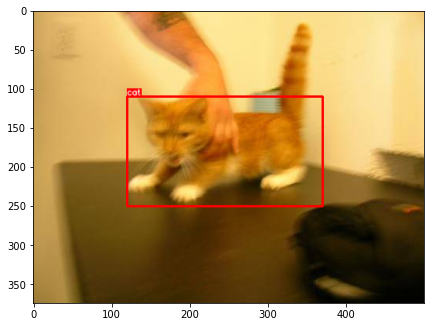

In [10]:
image = download_image(os.path.join(path, 'cat.0.jpg'))
image = np.array(image)

annotations = {'image': image, 'bboxes': [[120, 110, 250, 140]], 'category_id': [0]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

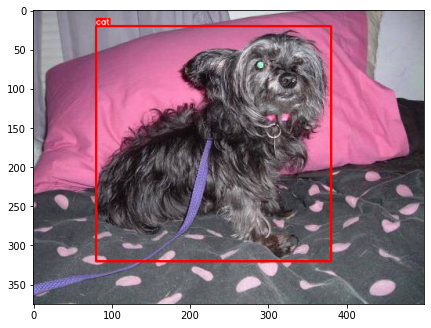

In [11]:
image = download_image(os.path.join(path, 'dog.0.jpg'))
image = np.array(image)

annotations = {'image': image, 'bboxes': [[80, 20, 300, 300]], 'category_id': [0]}
category_id_to_name = {0: 'cat', 1: 'dog'}
img = visualize(annotations, category_id_to_name)

# [Problem 4] Data expansion for object detection dataset

In [12]:
# ! pip install --upgrade albumentations

In [13]:
from urllib.request import urlopen
import cv2
import albumentations as A
from albumentations import (VerticalFlip, HorizontalFlip, Flip, RandomRotate90, Rotate, ShiftScaleRotate, CenterCrop, OpticalDistortion, GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
                            RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise, CLAHE, ChannelShuffle, InvertImg, RandomGamma, ToGray, PadIfNeeded)

def get_aug(aug, min_area=0., min_visibility=0.):
    return A.Compose(aug, bbox_params=A.BboxParams(format='coco', min_area=min_area,
                                                   min_visibility=min_visibility,
                                                   label_fields=['category_id']))

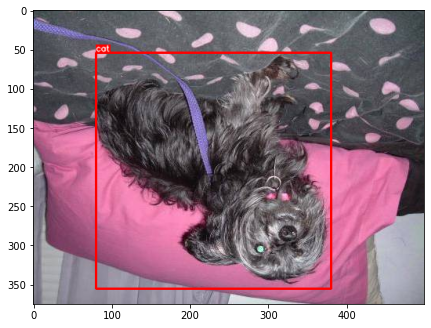

In [14]:
aug = get_aug([A.VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

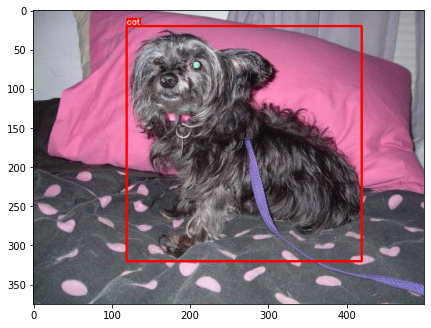

In [15]:
aug = get_aug([HorizontalFlip(p=0.5)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)